In [1]:
%matplotlib inline

import numpy as np
import scipy as scp
import re
import os
import sys
import pandas as pd
import shutil
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio import Align
import matplotlib.pyplot as plt
import itertools
from joblib import load

# adding project folder to lib search path
project = "/".join((os.path.split(os.getcwd())[0], os.path.split(os.getcwd())[1], 'scripts'))
if project not in sys.path:
    sys.path.append(project)
    
from loader import *
from work_with_files import *
import tree_building
import classificator_k_mer
import data_prep_k_mer
from calculating_metrics import *
import quantitative_analyze

### Making classificator with 20k rep genome

In [ ]:
data_prep_k_mer.main_analyzes('data/proteomes/human_proteome.fasta', 2, trembl_usage_human=False)

# this code will analyze 20k human genome and make csvs to 'classificator_k_mer.preprocessing_data' func

In [7]:
# reading CSVs

feature_matrix, labels = classificator_k_mer.preprocessing_data('data/csv_data_without_trembl/')

In [5]:
# classification (making classifier and saving it in dir)

classificator_k_mer.making_classificator(feature_matrix, labels, 'my_model')

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     12332
           1       0.97      0.32      0.48      2961

    accuracy                           0.87     15293
   macro avg       0.92      0.66      0.70     15293
weighted avg       0.88      0.87      0.84     15293

Saving classificator in ../saved_sklearn_models/ folder


### Classificator

In [9]:
clf = load('saved_sklearn_models/my_model.joblib')

In [10]:
# just checking
clf.classes_

array([0, 1])

In [22]:
# just predicting some human proteins to make sure second column is responding for 1-st class (column we should take)

clf.predict_proba(feature_matrix[7344:7350])

array([[0.21958988, 0.78041012],
       [0.4048953 , 0.5951047 ],
       [0.45736968, 0.54263032],
       [0.13162851, 0.86837149],
       [0.61495605, 0.38504395],
       [0.5373937 , 0.4626063 ]])

In [20]:
# bad human protein classified like bacteria's lol rofl lmao

labels[7348]

1

### Checking it out

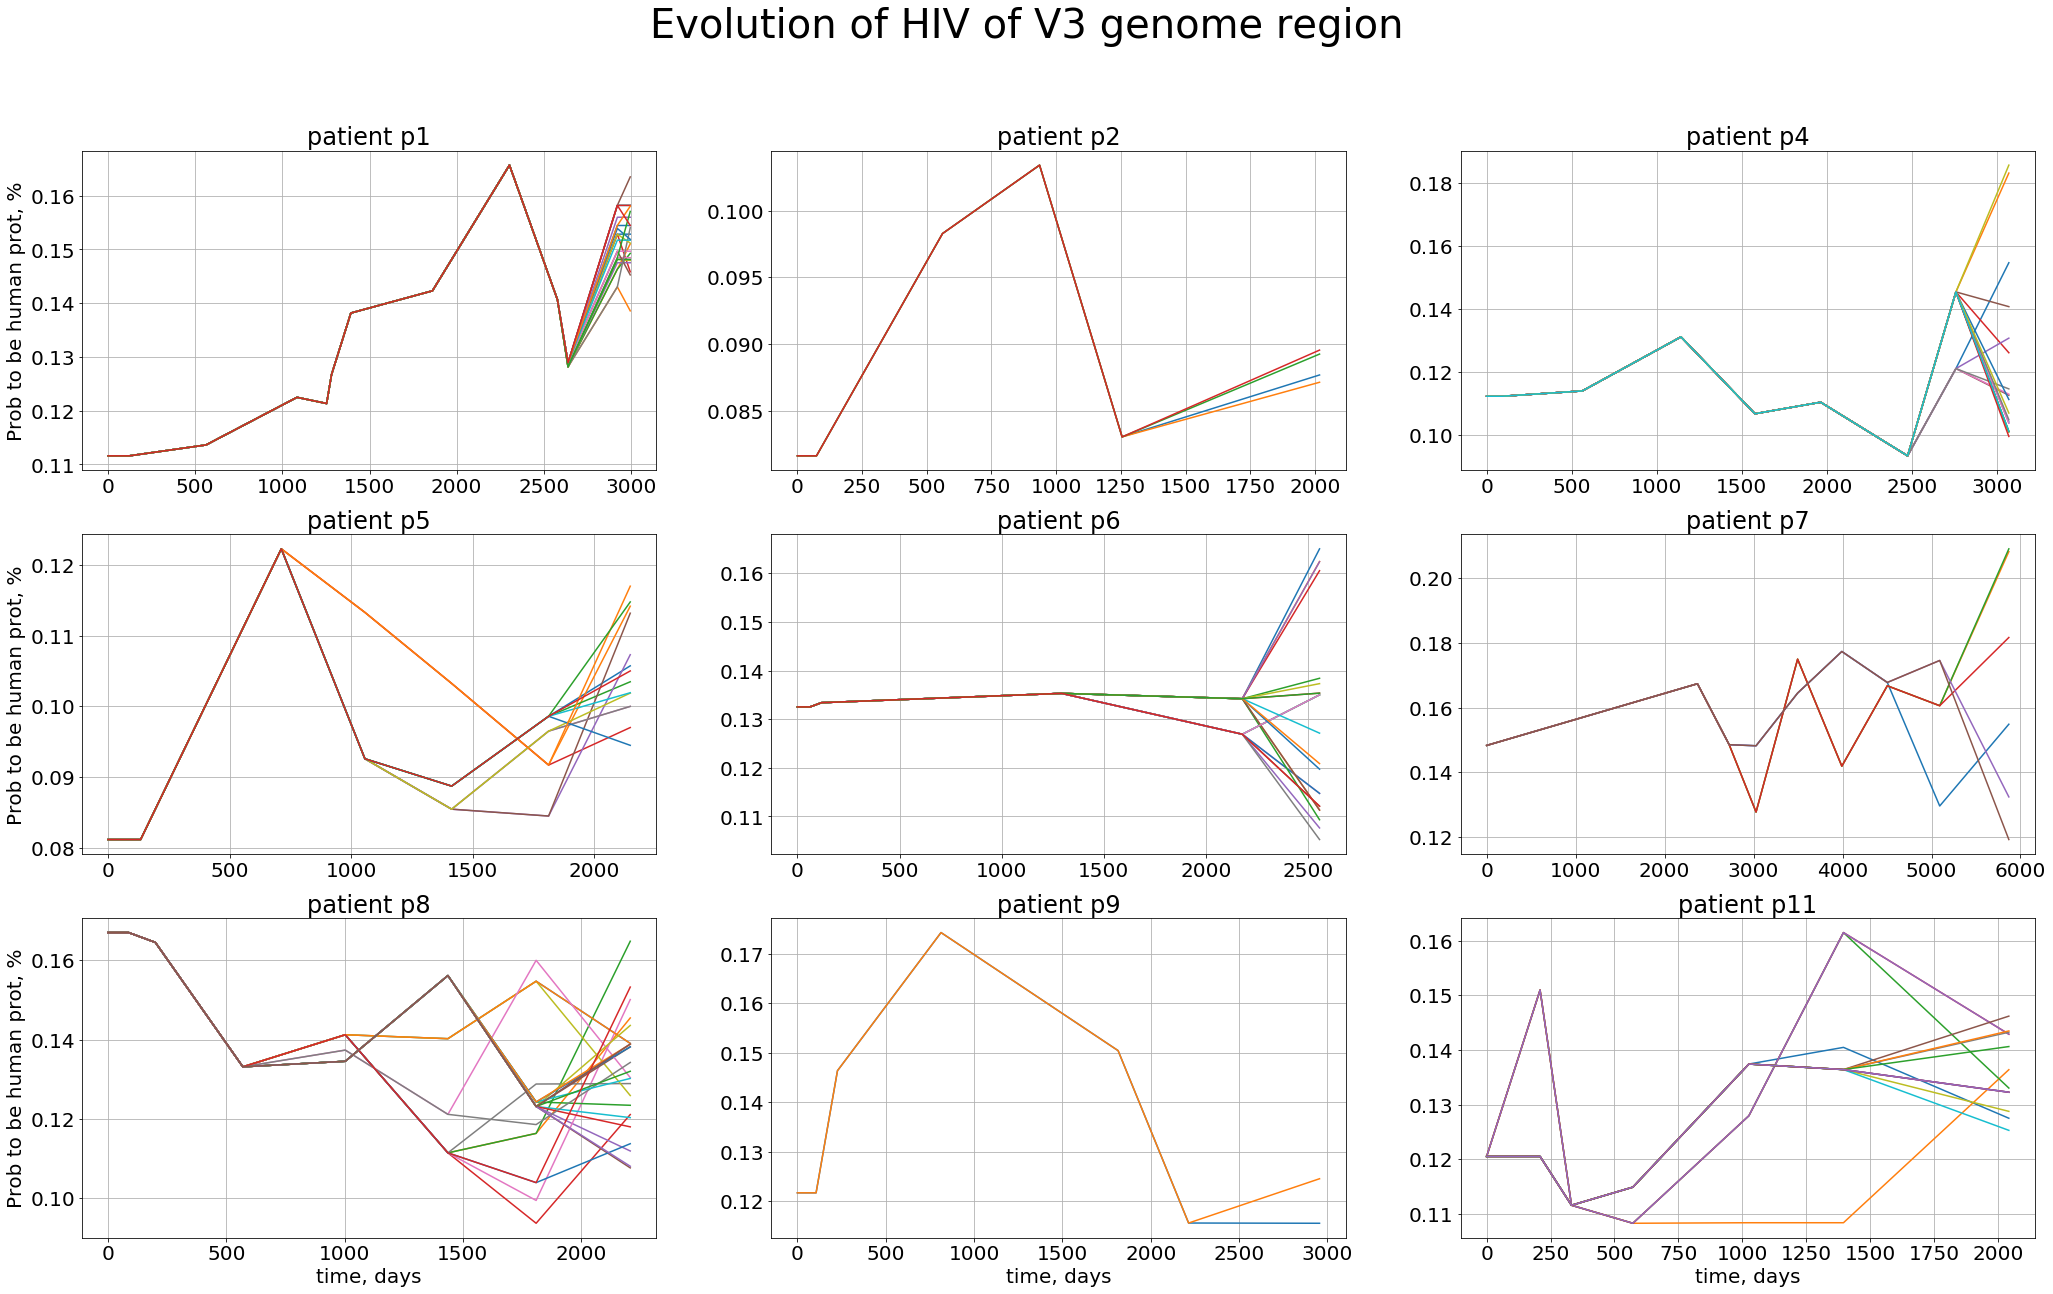

In [2]:
# Using our magic to analyze

quant = quantitative_analyze.Quantitative([f'p{i}' for i in range(1, 12)])

quant.loading_classificator('saved_sklearn_models/my_model.joblib')

quant.quantitative_analyzes('V3')

quant.plot_paths()

### Using classificator trained on 70k human genome

* Here we will check classificator trained on 70k human genome on data with 20k guman genome. Especially we will check probabilities of prediction for same proteins.

In [4]:
clf = load('saved_sklearn_models/forest.joblib')

In [5]:
# just checking
clf.classes_

array([0, 1], dtype=int32)

In [8]:
# just predicting some human proteins to make sure second column is responding for 1-st class (column we should take)

clf.predict_proba(feature_matrix[7344:7350])

# note: data here and when we're testing 20k human classificator is the same!

array([[0.29092303, 0.70907697],
       [0.28137425, 0.71862575],
       [0.25771752, 0.74228248],
       [0.08944468, 0.91055532],
       [0.21467502, 0.78532498],
       [0.28922801, 0.71077199]])

As we can see 

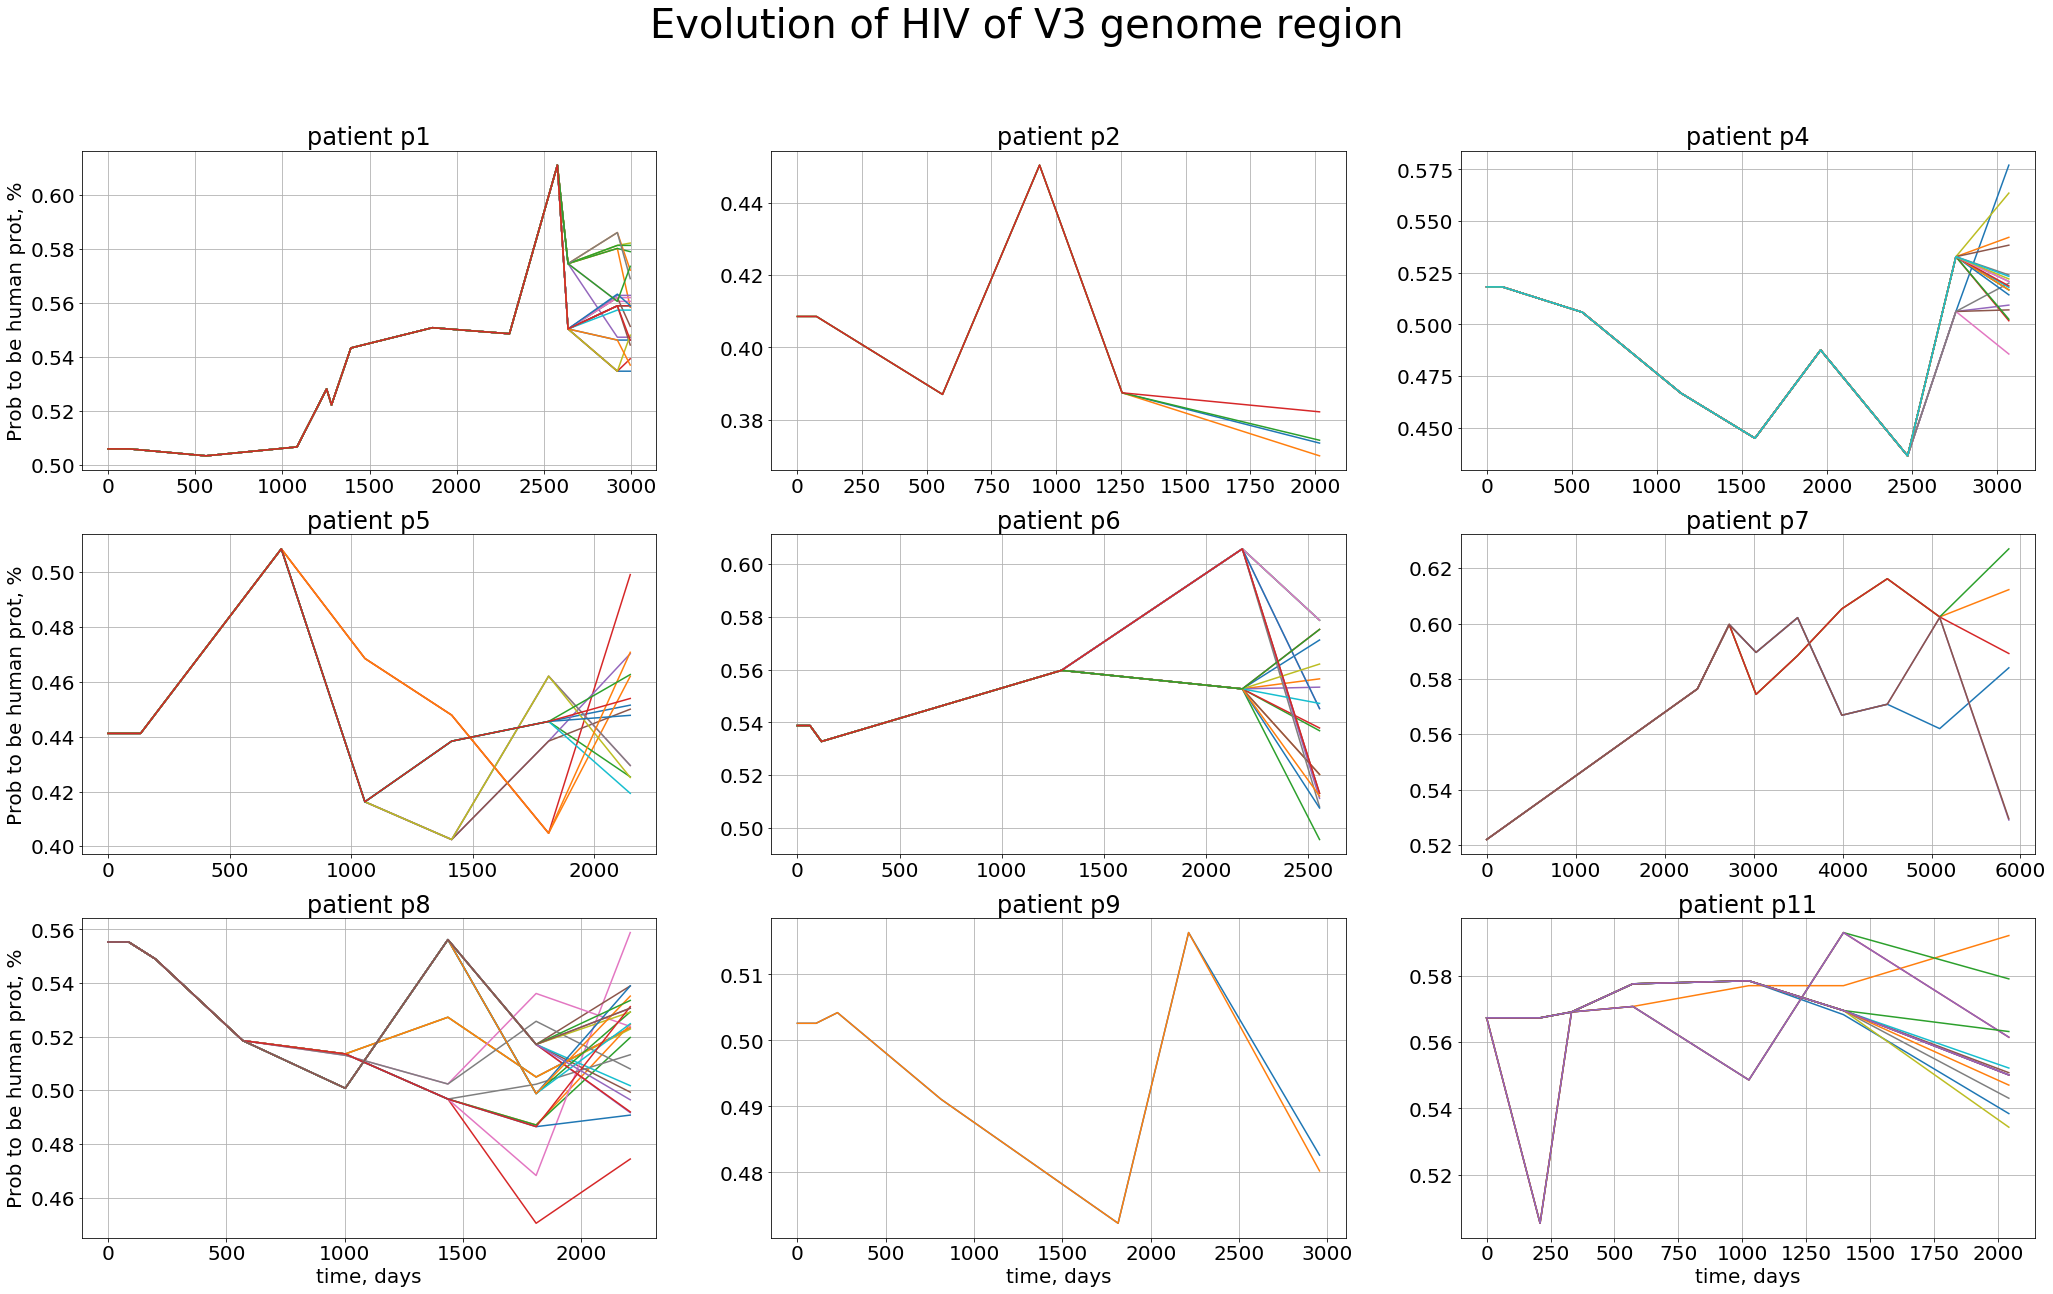

In [3]:
# Using our magic to analyze

quant.loading_classificator('saved_sklearn_models/forest.joblib')

quant.quantitative_analyzes('V3')

quant.plot_paths()